***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section. 

## Company Information:
The data set is based upon <a src="https://www.kaggle.com/prateikmahendra/loan-data"> Lending Club Information </a>. 
- TheIrish Dummy Banks  is a  peer to peer lending bank based in the ireland, in which bank provide funds for potential borrowers and bank earn a profit depending on the risk they take (the borrowers credit score). Irish Fake bank provides loan to their loyal customers. The complete data set is borrowed from Lending Club For more basic information about the company please check out the wikipedia article about the company. This dataset is copied and clean from kaggle but it has been changed. The any kind of similarity is just for learning purposes. I dont have any intention for palgrisim I just like to be clear myself. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>



## References:
1) <a src="https://www.kaggle.com/arthurtok/global-religion-1945-2010-plotly-pandas-visuals"> Global Religion 1945-2010: Plotly & Pandas visuals</a> by Anisotropic <br>
2) <a src="https://www.kaggle.com/vigilanf/loan-metrics-by-state"> Loan Metrics By State </a> by Frank Vigilante<br>
3) Hands on Machine Learning by Aurélien Géron <br>

- emp_length_int,
- annual_inc,
- loan_amount,
- interest_rate,
- dti,
- home_ownership_cat,
- income_cat,
- total_pymnt,
- purpose_cat, 
- grade_cat,
- application_type_cat,
- term_cat,year

#### Import our libraries we are going to use for our data analysis.

## Random Forests

Random Forests are a **slight variation of bagged trees** that has even more dependable performance! Here's how it works:

- Exactly like bagging, we produce an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, **each time a split is considered**, a random sample of m predictors is chosen as split candidates from the full set of p predictors. **The split is merely permitted to use one of those m predictors. **

- A new random sample of predictors is chosen for **every single tree at every single split**.
- For **classification**, m is typically chosen to be the square root of p. For **regression**, m is typically chosen to be somewhere between p/3 and p.

Main Idea:
- Suppose there is one very strong predictor in the data set. When using bagged, trees, most of the trees will use that predictor as the top split, resulting in an ensemble of similar trees that are "highly correlated".
- Averaging highly correlated quantities does not significantly reduce variance (which is the total goal of bagging).
- **By randomly leaving out candidate predictors from each split, Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variation of the resulting model.


### Feature selection
- In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

#### Why we calculate feature importance scores?
- we reduce the feature set. The new pruned features contain all features that have an importance score greater than a certain number.

In [2]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final313.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [7]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_inc','loan_amount',
                'interest_rate','dti','home_ownership_cat',
               'income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']

In [8]:
X = df[feature_cols]
y = df.loan_condition_cat

In [10]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=1)
rfclf.fit(df[feature_cols], df.loan_condition_cat)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [14]:
# compute the feature importances
a = pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

In [17]:
model = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=1)
model.fit(X, y)

feature_importance = model.feature_importances_



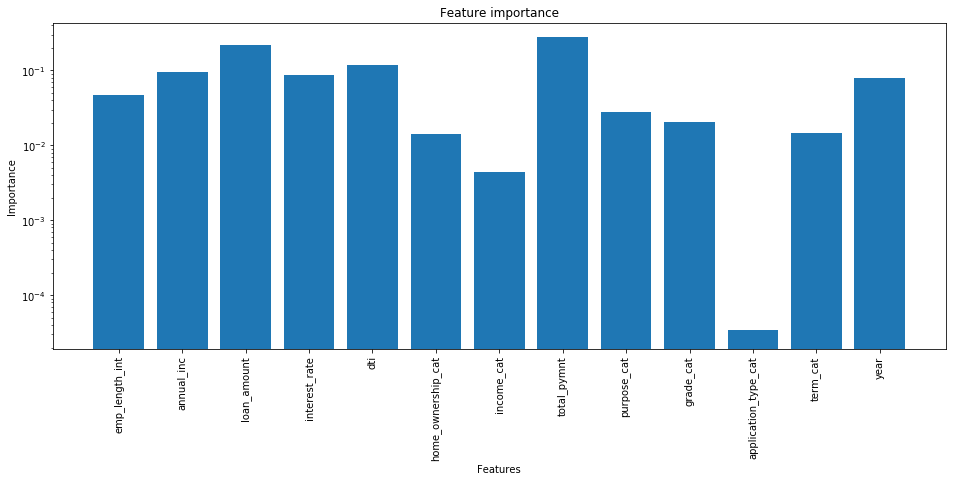

In [19]:
feature_importance = rfclf.feature_importances_
features = feature_cols
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')

plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), features, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

- Looking at the graph above, we see that some features are used rearly , while some impact the performance greatly. We can reduce the number of features by taking a subset of the most important features.

- What is the classification accuracy?
- Classification Accuracy. Classification accuracy is our starting point. It is the number of correct predictions - made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage

# Classification accuracy

In [12]:
# compute the out-of-bag classification accuracy
print('Mean squared error or classification error also known classification accuracy:',(rfclf.oob_score_)*100,'Percent')

Mean squared error or classification error also known classification accuracy: 95.86501370891129 Percent


# Conclusion:

We are really happy with the result the Mean squared error or classification error also known classification accuracy: ***95.86501370891129*** Percent which is nearly 96 percent. So, we can conclude our study with confirming that we could predict Bad Loan by using given Loan data with an accuracy of 96 %.

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)

--------------------------